# Librerias Necesarias

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import time
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

# Construcción base de datos 2

1. BASE_DE_DATOS_1: Datos obtenidos de los experimentos, tomando todas las muestras de tráfico sin ataque y 341423 muestras de tráfico con ataque. (Ataques de denegación de servicio).
Se utilizan 70% para entrenar y 30% para prueba.

2. BASE_DE_DATOS_2: Datos tomados en el item 1 junto con los datos utilizados en el entrenamiento inicial usando base de datos BOT-IOT y USNW-NB15.
Finalmente se tiene 741423 muestras para cada clase.
Se utilizan 70% para entrenar y 30% para prueba.

In [36]:
#Submuestra obtenida de los experimentos
data1 = pd.read_csv("data_base_1/database1_complete.csv")
#Submuestra usada en los entrenamientos
data2 = pd.read_csv("data_base/BOT_IOT_UNSW.csv")

data2.rename(columns={'attack':'tag',},inplace=True)
data2.drop(['saddr', 'sport', 'daddr', 'dport','proto','state'], axis=1, inplace=True)

In [37]:
database = pd.concat([data1,data2]).reset_index(drop = 'true')

In [38]:
database

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,tag
0,1.667600e+09,1,16,2340,2,1.667600e+09,0.287165,6,10,764,1576,216217,223361,1483,1521,1586,1483,1.605337e+01,15.645459,94,93,55.717096,16.053372,1
1,1.668699e+09,1,4,264,2,1.668699e+09,0.000555,2,2,132,132,32371,32371,429,429,429,429,1.353285e+02,135.328541,100,100,7207.207207,135.328541,1
2,1.668185e+09,1,15,2245,2,1.668185e+09,0.003612,5,10,669,1576,211050,211050,1395,1395,1434,1395,4.394365e+03,4394.365132,93,93,4152.823920,4394.365132,1
3,1.668101e+09,1,4,264,2,1.668101e+09,0.000342,2,2,132,132,126489,126489,894,894,894,894,8.533051e+00,8.533051,100,100,11695.906433,8.533051,1
4,1.668185e+09,1,15,2243,2,1.668185e+09,0.003222,5,10,667,1576,217589,217589,1440,1440,1467,1440,4.808543e+03,4808.543178,96,96,4655.493482,4808.543178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082841,1.424248e+09,2,2,264,1,1.424248e+09,0.000001,2,0,264,0,264,792,2,6,154,114,2.000000e+06,857142.857143,3,1,583333.333333,4776.269482,0
1082842,1.424228e+09,1,158,71930,2,1.424228e+09,0.226923,78,80,4550,67380,239508,189656,674,538,6287,158,6.326434e+02,389.802411,11,12,696.271422,696.271422,0
1082843,1.421936e+09,1,1257,1080228,2,1.421936e+09,5.545557,428,829,24086,1056142,1205784,1163728,1781,1707,6287,1579,2.792728e+02,283.293458,9,6,226.667943,275.159349,0
1082844,1.421965e+09,1,58,7616,2,1.421965e+09,0.590057,28,30,4536,3080,54616,116194,368,510,6287,58,5.492275e+02,135.739299,8,5,98.295588,98.295588,0


In [39]:
database.tag.value_counts()

1    541423
0    541423
Name: tag, dtype: int64

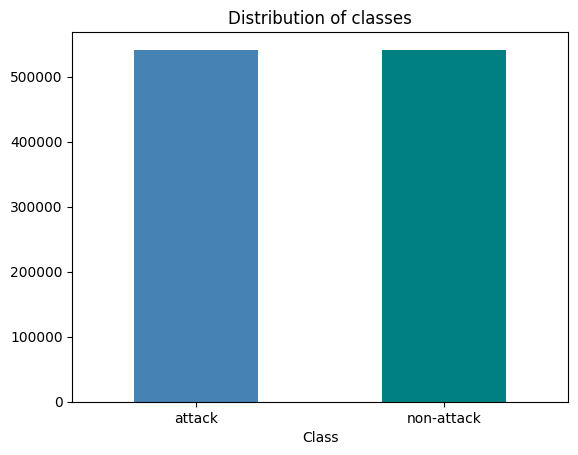

In [40]:
plt.figure()
plt.title("Distribution of classes")
database.tag.value_counts().plot(kind="bar", color=['steelblue','teal'])
plt.xticks(np.arange(2), ['attack','non-attack'],rotation = 360)
plt.xlabel("Class")
plt.show()

In [41]:
database.describe()

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,tag
count,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1.082846e+06,1082846.0
mean,1.597112e+09,1.188243e+00,7.804342e+01,1.196151e+05,2.517403e+00,1.597112e+09,5.003536e+00,4.144209e+01,3.680669e+01,2.463027e+04,1.038415e+05,9.112943e+05,5.360114e+05,1.036173e+03,9.078441e+02,3.146602e+03,9.397127e+02,5.093062e+04,3.182250e+04,6.161244e+01,5.863061e+01,4.151462e+04,8.256497e+04,0.5
std,9.819730e+07,5.798311e-01,1.603198e+03,1.886335e+06,2.262690e+00,9.819730e+07,2.095625e+01,1.505059e+03,3.699560e+02,2.302262e+06,1.497465e+06,8.766676e+06,5.919894e+06,3.954633e+03,3.225165e+03,8.163951e+03,4.224921e+03,2.315868e+05,1.878213e+05,4.171573e+01,4.220113e+01,2.405686e+05,3.739504e+05,0.5
min,1.421927e+09,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,1.421927e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,6.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.528085e+09,1.000000e+00,4.000000e+00,3.240000e+02,1.000000e+00,1.528085e+09,3.117000e-03,2.000000e+00,0.000000e+00,2.400000e+02,0.000000e+00,2.871225e+04,1.816000e+04,2.230000e+02,2.320000e+02,3.000000e+02,7.800000e+01,1.800936e+00,1.505545e+00,1.000000e+01,1.000000e+01,1.423773e+00,1.408781e+00,0.0
50%,1.667602e+09,1.000000e+00,9.000000e+00,7.700000e+02,2.000000e+00,1.667602e+09,5.139425e-01,5.000000e+00,4.000000e+00,6.000000e+02,2.400000e+02,6.898400e+04,6.688000e+04,6.540000e+02,6.440000e+02,9.980000e+02,5.180000e+02,1.406641e+01,1.163979e+01,9.100000e+01,7.800000e+01,1.255633e+01,1.490509e+01,0.5
75%,1.668186e+09,1.000000e+00,1.500000e+01,2.293000e+03,3.000000e+00,1.668186e+09,4.409024e+00,7.000000e+00,1.000000e+01,8.050000e+02,1.576000e+03,2.199160e+05,2.177660e+05,1.300000e+03,1.298000e+03,1.554000e+03,1.216000e+03,3.369160e+02,2.572352e+02,1.000000e+02,1.000000e+02,2.224694e+03,1.256619e+03,1.0
max,1.668713e+09,4.000000e+00,4.901290e+05,2.759905e+08,1.500000e+01,1.668713e+09,2.771485e+03,4.901290e+05,3.502900e+04,8.077562e+08,2.741219e+08,3.698772e+08,3.698346e+08,4.901290e+05,4.901290e+05,4.901290e+05,4.901290e+05,3.000000e+06,3.000000e+06,1.000000e+02,1.000000e+02,3.000000e+06,3.000000e+06,1.0


In [42]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082846 entries, 0 to 1082845
Data columns (total 24 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   stime               1082846 non-null  float64
 1   proto_number        1082846 non-null  int64  
 2   pkts                1082846 non-null  int64  
 3   bytes               1082846 non-null  int64  
 4   state_number        1082846 non-null  int64  
 5   ltime               1082846 non-null  float64
 6   dur                 1082846 non-null  float64
 7   spkts               1082846 non-null  int64  
 8   dpkts               1082846 non-null  int64  
 9   sbytes              1082846 non-null  int64  
 10  dbytes              1082846 non-null  int64  
 11  TnBPSrcIP           1082846 non-null  int64  
 12  TnBPDstIP           1082846 non-null  int64  
 13  TnP_PSrcIP          1082846 non-null  int64  
 14  TnP_PDstIP          1082846 non-null  int64  
 15  TnP_PerProto   

In [43]:
database.to_csv("data_base_2/database2_complete.csv", index=False)

División de los datos en entrenamiento y prueba

In [44]:
data_train, data_test = train_test_split(database, test_size=0.3, random_state=16)
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

Almacenado los datos de entrenamiento y preuba

In [45]:
data_train.to_csv("data_base_2/database2_train.csv", index=False)
data_test.to_csv("data_base_2/database2_test.csv", index=False)

In [46]:
# Creando los conjuntos X e Y a partir del conjunto de datos
x_train, y_train = data_train.drop(columns=['tag']), data_train.tag
x_test, y_test = data_test.drop(columns=['tag']), data_test.tag
print('x_train: ',x_train.shape, 'y_train: ', y_train.shape)
print('\nx_test: ',x_test.shape, 'x_test: ', y_test.shape)

x_train:  (757992, 23) y_train:  (757992,)

x_test:  (324854, 23) x_test:  (324854,)


# Estandarización datos de entrenameinto

In [47]:
# Estandarizando datos de entrenamiento
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(x_train[x_train.columns])
x_train[x_train.columns] = scaler.transform(x_train[x_train.columns])

In [48]:
# Almacenado parámetros de standarización
pickle.dump(scaler, open("data_base_2/database2_scaler.pkl", 'wb'))

In [49]:
x_train.describe()

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
count,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05,7.579920e+05
mean,-3.086319e-15,8.777826e-17,-5.624408e-20,6.561810e-18,5.766893e-17,-2.687342e-16,9.730226e-18,4.112848e-18,1.312362e-19,-7.311731e-19,-2.624724e-19,-3.224661e-18,-5.399432e-18,-2.962188e-17,-7.461715e-18,2.429744e-17,-5.924377e-18,7.278922e-18,5.684402e-17,7.611699e-17,-7.313605e-17,3.913651e-18,-4.088945e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.782234e+00,-2.049272e+00,-5.576994e-02,-6.383712e-02,-1.112455e+00,-1.782234e+00,-2.328598e-01,-3.191098e-02,-9.944189e-02,-1.047194e-02,-6.911933e-02,-1.036721e-01,-9.026551e-02,-2.651723e-01,-2.879027e-01,-3.865505e-01,-2.234449e-01,-2.199258e-01,-1.697223e-01,-1.450992e+00,-1.363771e+00,-1.729407e-01,-2.210091e-01
25%,-7.018360e-01,-3.239918e-01,-5.352747e-02,-6.369545e-02,-6.701515e-01,-7.018358e-01,-2.327154e-01,-3.026350e-02,-9.944189e-02,-1.035498e-02,-6.911933e-02,-1.004498e-01,-8.723489e-02,-2.086112e-01,-2.144428e-01,-3.498495e-01,-2.051680e-01,-2.199180e-01,-1.697142e-01,-1.235306e+00,-1.174252e+00,-1.729347e-01,-2.210054e-01
50%,7.180698e-01,-3.239918e-01,-4.979003e-02,-6.345611e-02,-2.278481e-01,7.180697e-01,-2.093971e-01,-2.779227e-02,-8.868356e-02,-1.017955e-02,-6.896039e-02,-9.590016e-02,-7.907941e-02,-9.856038e-02,-8.405937e-02,-2.641731e-01,-1.012037e-01,-2.198647e-01,-1.696600e-01,7.058647e-01,4.603494e-01,-1.728880e-01,-2.209691e-01
75%,7.240120e-01,-3.239918e-01,-4.530510e-02,-6.263881e-02,2.144552e-01,7.240120e-01,-2.962886e-02,-2.614478e-02,-7.254606e-02,-1.007964e-02,-6.807564e-02,-7.887781e-02,-5.373498e-02,6.728371e-02,1.245541e-01,-1.959265e-01,6.494936e-02,-2.184676e-01,-1.683473e-01,9.215503e-01,9.815268e-01,-1.635669e-01,-2.176052e-01
max,7.293803e-01,4.851848e+00,2.941173e+02,1.480426e+02,5.522095e+00,7.293803e-01,1.283501e+02,3.241522e+02,9.411395e+01,2.811564e+02,1.814664e+02,4.161083e+01,6.197104e+01,1.004567e+02,1.248640e+02,4.791987e+01,9.318994e+01,1.273951e+01,1.580185e+01,9.215503e-01,9.815268e-01,1.228736e+01,7.788511e+00


# Estandarización datos de prueba

In [50]:
scaler = pickle.load(open("data_base_2/database2_scaler.pkl", 'rb'))
x_test[x_test.columns] = scaler.transform(x_test[x_test.columns])

In [51]:
x_test.describe()

,stime,proto_number,pkts,bytes,state_number,ltime,dur,spkts,dpkts,sbytes,dbytes,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport
count,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000,324854.000000
mean,0.002253,0.002599,0.006064,0.001068,0.003337,0.002253,-0.002403,0.007422,-0.001491,0.005103,-0.001170,-0.003012,-0.001095,-0.000793,0.001604,-0.001472,-0.002102,0.000283,-0.001013,0.005299,0.004969,-0.001708,-0.001913
std,0.997944,1.001234,1.566403,1.040353,1.002644,0.997944,0.904244,1.670377,0.983326,1.364765,0.972013,0.961813,0.977851,1.039844,1.083074,1.006947,1.009413,1.001371,0.999781,0.999058,0.999123,0.997282,0.994615
min,-1.782234,-2.049272,-0.055770,-0.063837,-1.112455,-1.782234,-0.232860,-0.031911,-0.099442,-0.010472,-0.069119,-0.103672,-0.090266,-0.265172,-0.287903,-0.386550,-0.223445,-0.219926,-0.169722,-1.450992,-1.363771,-0.172941,-0.221009
25%,-0.701836,-0.323992,-0.053527,-0.063695,-0.670151,-0.701836,-0.232715,-0.030263,-0.099442,-0.010355,-0.069119,-0.100433,-0.087205,-0.208099,-0.214443,-0.349850,-0.204931,-0.219918,-0.169714,-1.211341,-1.150562,-0.172935,-0.221005
50%,0.718070,-0.323992,-0.049790,-0.063456,-0.227848,0.718070,-0.208060,-0.027792,-0.088684,-0.010180,-0.068960,-0.095890,-0.078999,-0.097025,-0.082151,-0.263928,-0.099305,-0.219866,-0.169661,0.729830,0.460349,-0.172890,-0.220970
75%,0.724012,-0.323992,-0.045305,-0.062639,0.214455,0.724012,-0.025675,-0.026145,-0.072546,-0.010080,-0.068076,-0.078872,-0.053723,0.067284,0.125190,-0.196049,0.065424,-0.218482,-0.168368,0.921550,0.981527,-0.164012,-0.217784
max,0.729380,4.851848,366.308974,87.109248,5.522095,0.729380,127.650742,403.708472,91.332926,393.630704,106.924332,41.610829,49.160858,125.174384,155.576879,59.774523,116.114072,12.739509,15.801854,0.921550,0.981527,12.287360,7.788511


# Entrenamiento de los modelos de aprendizaje automático

## Árboles de decisión

In [52]:
clf = DecisionTreeClassifier(random_state=0)
param = {'max_depth':[8, 10, 12, 14],
         'min_samples_split':[2, 4, 6]}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END max_depth=8, min_samples_split=2; acc: (train=0.999, test=0.999) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) precision: (train=1.000, test=1.000) recall: (train=0.999, test=0.999) total time=  12.0s
[CV 2/3] END max_depth=8, min_samples_split=2; acc: (train=0.999, test=0.999) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) precision: (train=1.000, test=1.000) recall: (train=0.999, test=0.999) total time=  10.0s
[CV 3/3] END max_depth=8, min_samples_split=2; acc: (train=0.999, test=0.999) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) precision: (train=1.000, test=1.000) recall: (train=0.999, test=0.998) total time=  11.1s
[CV 1/3] END max_depth=8, min_samples_split=4; acc: (train=0.999, test=0.999) auc: (train=1.000, test=1.000) f1: (train=0.999, test=0.999) precision: (train=1.000, test=1.000) recall: (train=0.999, test=0.999) total time=  11.0s
[CV 2/3] END max_depth=

Mejores parámetros de entrenamiento

In [53]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  DecisionTreeClassifier(max_depth=14, random_state=0)
Mejores parámetros:  {'max_depth': 14, 'min_samples_split': 2}
Mejor puntuación (accuracy): 0.9998113436553421


Entrenando el modelo con los mejores parámetros

In [54]:
# Entrenamiento del modelo
start = time.time()
model_dt = DecisionTreeClassifier(max_depth = 14, min_samples_split=2, random_state=0).fit(x_train,y_train)
end_train = time.time()
# Predicción
pred_dt_test = model_dt.predict(x_test)
end_predict = time.time()
pred_dt_train = model_dt.predict(x_train)
time_dt_train = end_train-start
time_dt_test = end_predict-end_train

Almacenando el modelo entrenado

In [55]:
pickle.dump(model_dt, open("data_base_2/database2_model_dt.pkl", 'wb'))
model_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

## Bosques aleatorios

In [56]:
clf = RandomForestClassifier(random_state=0)
param = {'n_estimators':[100, 200, 300],
         'max_depth':[20, 22, 24]}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END max_depth=20, n_estimators=100; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time= 3.2min
[CV 2/3] END max_depth=20, n_estimators=100; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time= 2.3min
[CV 3/3] END max_depth=20, n_estimators=100; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time= 2.3min
[CV 1/3] END max_depth=20, n_estimators=200; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=1.000, test=1.000) recall: (train=1.000, test=1.000) total time= 4.2min
[CV 2/3] END max_depth=20, n_est

In [57]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  RandomForestClassifier(max_depth=20, random_state=0)
Mejores parámetros:  {'max_depth': 20, 'n_estimators': 100}
Mejor puntuación (accuracy): 0.9999736144972506


In [58]:
# Entrenamiento del modelo
start = time.time()
model_rf = RandomForestClassifier(random_state=0, n_estimators = 100,  max_depth = 20).fit(x_train,y_train)
end_train = time.time()
pred_rf_test = model_rf.predict(x_test)
end_predict = time.time()
pred_rf_train = model_rf.predict(x_train)
time_rf_train = end_train-start
time_rf_test = end_predict-end_train

In [59]:
pickle.dump(model_rf, open("data_base_2/database2_model_rf.pkl", 'wb'))
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

# Regresión logística

In [60]:
clf = SGDClassifier(loss='log_loss', random_state=0)
param = {'alpha':np.logspace(-6, 1, 8),
         'penalty': ['l2','l1']}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END alpha=1e-06, penalty=l2; acc: (train=0.967, test=0.967) auc: (train=0.995, test=0.994) f1: (train=0.967, test=0.967) precision: (train=0.964, test=0.964) recall: (train=0.970, test=0.970) total time=   9.5s
[CV 2/3] END alpha=1e-06, penalty=l2; acc: (train=0.965, test=0.965) auc: (train=0.990, test=0.990) f1: (train=0.965, test=0.965) precision: (train=0.950, test=0.950) recall: (train=0.982, test=0.982) total time=  12.9s
[CV 3/3] END alpha=1e-06, penalty=l2; acc: (train=0.970, test=0.970) auc: (train=0.995, test=0.994) f1: (train=0.970, test=0.970) precision: (train=0.963, test=0.963) recall: (train=0.977, test=0.978) total time=   8.2s
[CV 1/3] END alpha=1e-06, penalty=l1; acc: (train=0.961, test=0.960) auc: (train=0.988, test=0.988) f1: (train=0.961, test=0.959) precision: (train=0.963, test=0.962) recall: (train=0.959, test=0.957) total time=   9.6s
[CV 2/3] END alpha=1e-06, penalty=l1; acc: (train=0.957, te

c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END alpha=10.0, penalty=l1; acc: (train=0.501, test=0.501) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   1.7s
[CV 2/3] END alpha=10.0, penalty=l1; acc: (train=0.499, test=0.499) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.499, test=0.499) recall: (train=1.000, test=1.000) total time=   1.9s
[CV 3/3] END alpha=10.0, penalty=l1; acc: (train=0.499, test=0.499) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.499, test=0.499) recall: (train=1.000, test=1.000) total time=   1.9s


In [61]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  SGDClassifier(loss='log_loss', random_state=0)
Mejores parámetros:  {'alpha': 0.0001, 'penalty': 'l2'}
Mejor puntuación (accuracy): 0.9689983535446286


In [62]:
# Entrenamiento del modelo
start = time.time()
model_lr = SGDClassifier(loss='log_loss', random_state=0, alpha = 0.0001, penalty = 'l2').fit(x_train,y_train)
end_train = time.time()
pred_lr_test = model_lr.predict(x_test)
end_predict = time.time()
pred_lr_train = model_lr.predict(x_train)
time_lr_train = end_train-start
time_lr_test = end_predict-end_train

In [70]:
pickle.dump(model_lr, open("data_base_2/database2_model_lr.pkl", 'wb'))
model_lr.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'log_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Máquina de soporte vectorial

In [64]:
clf = SGDClassifier(loss='hinge', random_state=0)
param = {'alpha':[10**x for x in range(-5,3)],
         'penalty': ['l2','l1']}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END alpha=1e-05, penalty=l2; acc: (train=0.968, test=0.968) auc: (train=0.992, test=0.992) f1: (train=0.969, test=0.969) precision: (train=0.952, test=0.952) recall: (train=0.986, test=0.986) total time=   3.9s
[CV 2/3] END alpha=1e-05, penalty=l2; acc: (train=0.968, test=0.968) auc: (train=0.992, test=0.992) f1: (train=0.968, test=0.968) precision: (train=0.956, test=0.957) recall: (train=0.980, test=0.980) total time=   3.1s
[CV 3/3] END alpha=1e-05, penalty=l2; acc: (train=0.970, test=0.970) auc: (train=0.993, test=0.992) f1: (train=0.971, test=0.971) precision: (train=0.959, test=0.959) recall: (train=0.983, test=0.983) total time=   4.0s
[CV 1/3] END alpha=1e-05, penalty=l1; acc: (train=0.958, test=0.957) auc: (train=0.987, test=0.986) f1: (train=0.958, test=0.957) precision: (train=0.958, test=0.957) recall: (train=0.958, test=0.957) total time=   4.5s
[CV 2/3] END alpha=1e-05, penalty=l1; acc: (train=0.964, te

c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END alpha=10, penalty=l1; acc: (train=0.501, test=0.501) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   1.5s
[CV 2/3] END alpha=10, penalty=l1; acc: (train=0.499, test=0.499) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.499, test=0.499) recall: (train=1.000, test=1.000) total time=   1.5s
[CV 3/3] END alpha=10, penalty=l1; acc: (train=0.499, test=0.499) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.499, test=0.499) recall: (train=1.000, test=1.000) total time=   1.5s


c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END alpha=100, penalty=l2; acc: (train=0.501, test=0.501) auc: (train=0.951, test=0.951) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   1.3s
[CV 2/3] END alpha=100, penalty=l2; acc: (train=0.499, test=0.499) auc: (train=0.951, test=0.951) f1: (train=0.666, test=0.666) precision: (train=0.499, test=0.499) recall: (train=1.000, test=1.000) total time=   1.3s
[CV 3/3] END alpha=100, penalty=l2; acc: (train=0.499, test=0.499) auc: (train=0.952, test=0.951) f1: (train=0.666, test=0.666) precision: (train=0.499, test=0.499) recall: (train=1.000, test=1.000) total time=   1.2s


c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kapla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/3] END alpha=100, penalty=l1; acc: (train=0.501, test=0.501) auc: (train=0.500, test=0.500) f1: (train=0.000, test=0.000) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   1.5s
[CV 2/3] END alpha=100, penalty=l1; acc: (train=0.499, test=0.499) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.499, test=0.499) recall: (train=1.000, test=1.000) total time=   1.5s
[CV 3/3] END alpha=100, penalty=l1; acc: (train=0.499, test=0.499) auc: (train=0.500, test=0.500) f1: (train=0.666, test=0.666) precision: (train=0.499, test=0.499) recall: (train=1.000, test=1.000) total time=   1.4s


In [65]:
print('Mejor estimador: ', hyperparam_tuning.best_estimator_)
print('Mejores parámetros: ', hyperparam_tuning.best_params_)
print('Mejor puntuación (accuracy):', hyperparam_tuning.best_score_)

Mejor estimador:  SGDClassifier(alpha=0.001, random_state=0)
Mejores parámetros:  {'alpha': 0.001, 'penalty': 'l2'}
Mejor puntuación (accuracy): 0.9696039008327265


In [66]:
# Entrenamiento del modelo
start = time.time()
model_svm_linear = SGDClassifier(loss='hinge', random_state=0, alpha = 0.001, penalty = 'l2').fit(x_train,y_train)
end_train = time.time()
pred_svm_linear_test = model_svm_linear.predict(x_test)
end_predict = time.time()
pred_svm_linear_train = model_svm_linear.predict(x_train)
time_svm_linear_train = end_train-start
time_svm_linear_test = end_predict-end_train

In [69]:
pickle.dump(model_svm_linear, open("data_base_2/database2_model_svm_linear.pkl", 'wb'))
model_svm_linear.get_params()

{'alpha': 0.001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Méticas de rendimiento de los modelos

## Datos de entrenamiento

In [71]:
def calculate_metrics(y_true, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision_1 = metrics.precision_score(y_true, y_pred)
    precision_0 = metrics.precision_score(y_true, y_pred, pos_label=0)
    precision_avg = metrics.precision_score(y_true, y_pred, average='macro')
    recall_1 = metrics.recall_score(y_true, y_pred)
    recall_0 = metrics.recall_score(y_true, y_pred, pos_label=0)
    recall_avg = metrics.recall_score(y_true, y_pred, average='macro')
    f1_score_1 = metrics.f1_score(y_true, y_pred)
    f1_score_0 = metrics.f1_score(y_true, y_pred, pos_label=0)
    f1_score_avg = metrics.f1_score(y_true, y_pred, average='macro')
    return [accuracy, precision_1, precision_0, precision_avg, recall_1, recall_0, recall_avg, f1_score_1, f1_score_0, \
           f1_score_avg, confusion_matrix]

In [72]:
metric_dt_train = calculate_metrics(y_train, pred_dt_train)
metric_dt_train.append(time_dt_train)

metric_rf_train = calculate_metrics(y_train, pred_rf_train)
metric_rf_train.append(time_rf_train)

metric_lr_train = calculate_metrics(y_train, pred_lr_train)
metric_lr_train.append(time_lr_train)

metric_svm_linear_train = calculate_metrics(y_train, pred_svm_linear_train)
metric_svm_linear_train.append(time_svm_linear_train)

metric_train = pd.DataFrame(index=['DT','RF','LR','SVM_LINEAR'], columns=['Accuracy', 'Precision_1', 'Precision_0', 'Precision_avg', 
'Recall_1', 'Recall_0', 'Recall_avg', 'F1_score_1', 'F1_score_0', 'F1_score_avg', 'Confusion_matrix','Time'])

metric_train.loc['DT'] = metric_dt_train
metric_train.loc['RF'] = metric_rf_train
metric_train.loc['LR'] = metric_lr_train
metric_train.loc['SVM_LINEAR'] = metric_svm_linear_train

metric_train

,Accuracy,Precision_1,Precision_0,Precision_avg,Recall_1,Recall_0,Recall_avg,F1_score_1,F1_score_0,F1_score_avg,Confusion_matrix,Time
DT,0.999856,1.0,0.999713,0.999856,0.999712,1.0,0.999856,0.999856,0.999856,0.999856,"[[379565, 0], [109, 378318]]",21.694382
RF,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[379565, 0], [0, 378427]]",207.022728
LR,0.968857,0.957802,0.980422,0.969112,0.980834,0.956916,0.968875,0.969181,0.968527,0.968854,"[[363212, 16353], [7253, 371174]]",2.987016
SVM_LINEAR,0.969527,0.956581,0.983184,0.969883,0.983608,0.955489,0.969548,0.969907,0.969138,0.969523,"[[362670, 16895], [6203, 372224]]",1.583687


## Datos de prueba

In [73]:
metric_dt_test = calculate_metrics(y_test, pred_dt_test)
metric_dt_test.append(time_dt_test)

metric_rf_test = calculate_metrics(y_test, pred_rf_test)
metric_rf_test.append(time_rf_test)

metric_lr_test = calculate_metrics(y_test, pred_lr_test)
metric_lr_test.append(time_lr_test)

metric_svm_linear_test = calculate_metrics(y_test, pred_svm_linear_test)
metric_svm_linear_test.append(time_svm_linear_test)

metric_test = pd.DataFrame(index=['DT','RF','LR','SVM_LINEAR'], columns=['Accuracy', 'Precision_1', 'Precision_0', 'Precision_avg', 
'Recall_1', 'Recall_0', 'Recall_avg', 'F1_score_1', 'F1_score_0', 'F1_score_avg', 'Confusion_matrix','Time'])

metric_test.loc['DT'] = metric_dt_test
metric_test.loc['RF'] = metric_rf_test
metric_test.loc['LR'] = metric_lr_test
metric_test.loc['SVM_LINEAR'] = metric_svm_linear_test

metric_test

,Accuracy,Precision_1,Precision_0,Precision_avg,Recall_1,Recall_0,Recall_avg,F1_score_1,F1_score_0,F1_score_avg,Confusion_matrix,Time
DT,0.999855,0.999975,0.999734,0.999855,0.999736,0.999975,0.999856,0.999856,0.999855,0.999855,"[[161854, 4], [43, 162953]]",0.116675
RF,0.999988,1.0,0.999975,0.999988,0.999975,1.0,0.999988,0.999988,0.999988,0.999988,"[[161858, 0], [4, 162992]]",2.84085
LR,0.969075,0.958318,0.980436,0.969377,0.981036,0.95703,0.969033,0.969544,0.968592,0.969068,"[[154903, 6955], [3091, 159905]]",0.030005
SVM_LINEAR,0.969746,0.957016,0.98331,0.970163,0.983895,0.955498,0.969697,0.97027,0.969205,0.969737,"[[154655, 7203], [2625, 160371]]",0.03


# Matriz de confusión de los modelos

In [74]:
def confusion_matrix_graf(confusion_matrix, title = 'Confusion Matrix'):
    # Confusion martix of train and test
    # Train confusion matrix
    labels= ['non-attack', 'attack']
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix,
                annot=True, cmap=sns.light_palette("blue"), fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)

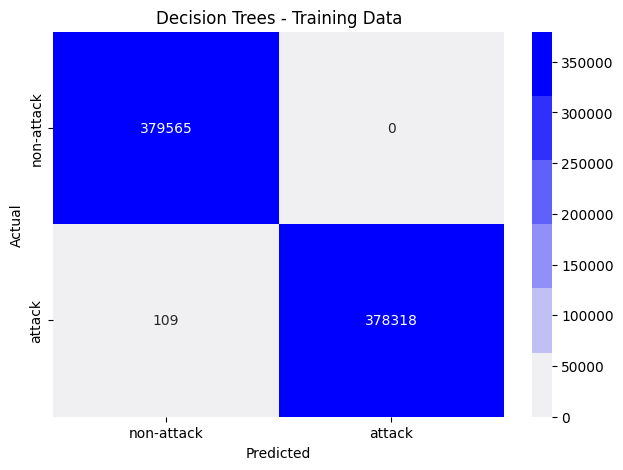

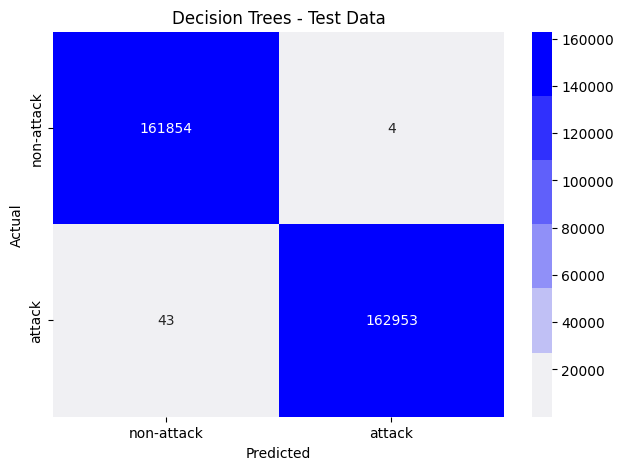

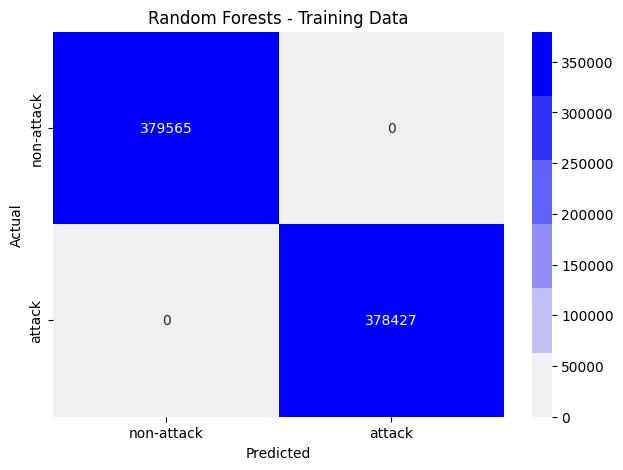

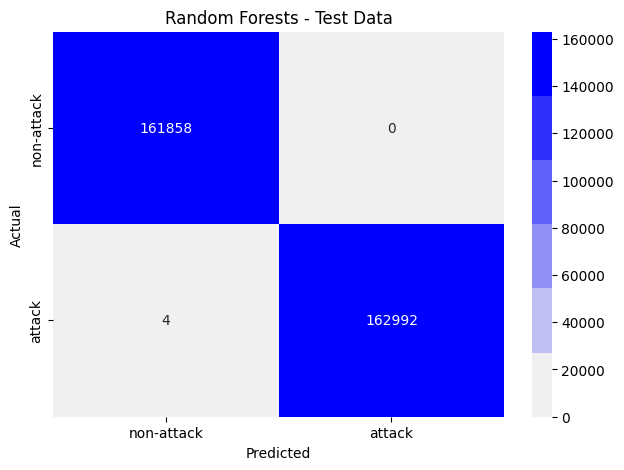

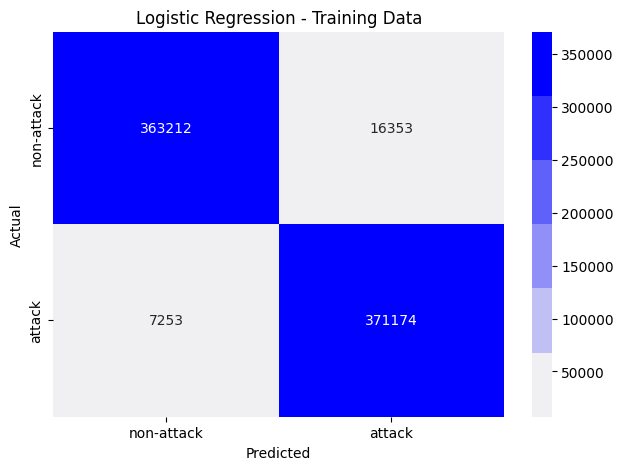

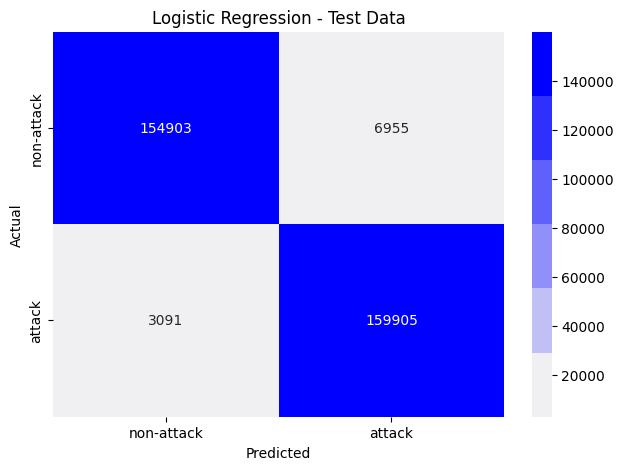

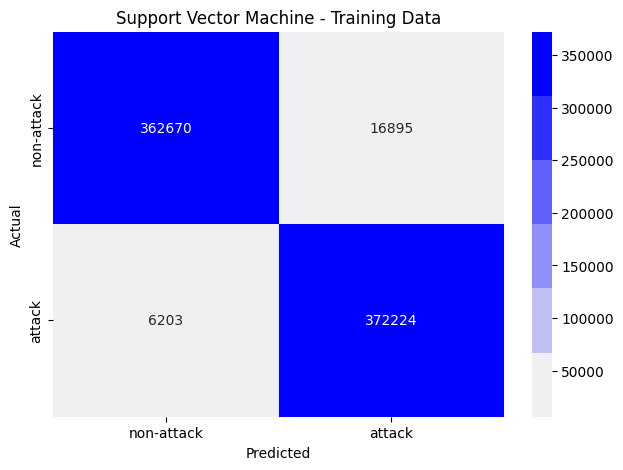

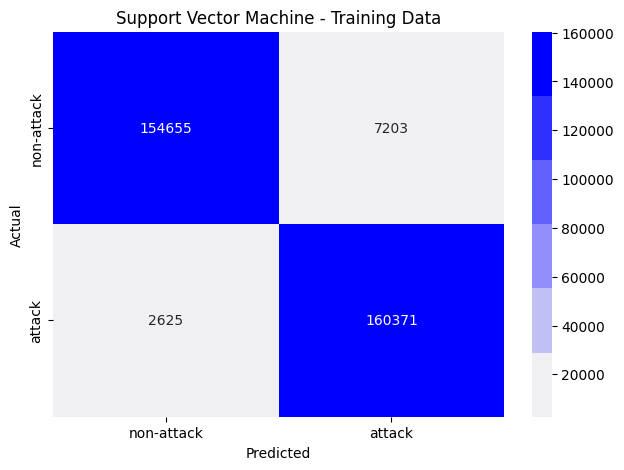

In [75]:
confusion_matrix_graf(metric_dt_train[-2],"Decision Trees - Training Data")
confusion_matrix_graf(metric_dt_test[-2], "Decision Trees - Test Data")

confusion_matrix_graf(metric_rf_train[-2],"Random Forests - Training Data")
confusion_matrix_graf(metric_rf_test[-2], "Random Forests - Test Data")

confusion_matrix_graf(metric_lr_train[-2],"Logistic Regression - Training Data")
confusion_matrix_graf(metric_lr_test[-2], "Logistic Regression - Test Data")

confusion_matrix_graf(metric_svm_linear_train[-2],"Support Vector Machine - Training Data")
confusion_matrix_graf(metric_svm_linear_test[-2], "Support Vector Machine - Training Data")